In [7]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [8]:
df = pdr.get_data_tiingo('AAPL', api_key='ab2882f6485e2828c46882b863cc7c8cdaaef007')
df.head()

C:\Users\sinch\AppData\Local\Temp\ipykernel_13328\918027198.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key='ab2882f6485e2828c46882b863cc7c8cdaaef007')


close    high      low    open    volume  \
symbol date                                                                   
AAPL   2017-12-11 00:00:00+00:00  172.67  172.89  168.790  169.20  33092051   
       2017-12-12 00:00:00+00:00  171.70  172.39  171.461  172.15  18945457   
       2017-12-13 00:00:00+00:00  172.27  173.54  172.000  172.50  23142242   
       2017-12-14 00:00:00+00:00  172.22  173.13  171.650  172.40  20219307   
       2017-12-15 00:00:00+00:00  173.97  174.17  172.460  173.63  37054632   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-12-11 00:00:00+00:00  41.046071  41.098368  40.123740  40.221203   
       2017-12-12 00:00:00+00:00  40.815488  40.979511  40.758674  40.922459   
       2017-12-13 00:00:00+00:00  40.950985  41.252882  40.886802  41.005659   
       2017-12-14 00:00:00+00:00  40.939099  41.155419  40.803602  40.981888   
       2017-12-15 00:00:00+00:00  41.355099  41.402642  40.996151  41.274276   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-12-11 00:00:00+00:00  132368204      0.0          1.0  
       2017-12-12 00:00:00+00:00   75781828      0.0          1.0  
       2017-12-13 00:00:00+00:00   92568968      0.0          1.0  
       2017-12-14 00:00:00+00:00   80877228      0.0          1.0  
       2017-12-15 00:00:00+00:00  148218528      0.0          1.0

In [9]:
df.tail()

close      high     low     open    volume  \
symbol date                                                                     
AAPL   2022-12-01 00:00:00+00:00  148.31  149.1300  146.61  148.210  71250416   
       2022-12-02 00:00:00+00:00  147.81  148.0000  145.65  145.960  65447446   
       2022-12-05 00:00:00+00:00  146.63  150.9199  145.77  147.770  68826442   
       2022-12-06 00:00:00+00:00  142.91  147.3000  141.92  147.075  64727186   
       2022-12-07 00:00:00+00:00  140.94  143.3700  140.00  142.190  69721094   

                                  adjClose   adjHigh  adjLow  adjOpen  \
symbol date                                                             
AAPL   2022-12-01 00:00:00+00:00    148.31  149.1300  146.61  148.210   
       2022-12-02 00:00:00+00:00    147.81  148.0000  145.65  145.960   
       2022-12-05 00:00:00+00:00    146.63  150.9199  145.77  147.770   
       2022-12-06 00:00:00+00:00    142.91  147.3000  141.92  147.075   
       2022-12-07 00:00:00+00:00    140.94  143.3700  140.00  142.190   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2022-12-01 00:00:00+00:00   71250416      0.0          1.0  
       2022-12-02 00:00:00+00:00   65447446      0.0          1.0  
       2022-12-05 00:00:00+00:00   68826442      0.0          1.0  
       2022-12-06 00:00:00+00:00   64727186      0.0          1.0  
       2022-12-07 00:00:00+00:00   69721094      0.0          1.0

In [10]:
df1 = df.reset_index()['close']
df1.head()

0    172.67
1    171.70
2    172.27
3    172.22
4    173.97
Name: close, dtype: float64

In [11]:
df1.shape

(1257,)

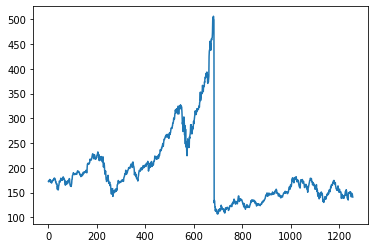

In [12]:
plt.plot(df1)

In [13]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1257, 1)

In [15]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [16]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train

array([[0.16488416, 0.1624546 , 0.16388228, ..., 0.17465247, 0.17545398,
        0.19283657],
       [0.1624546 , 0.16388228, 0.16375704, ..., 0.17545398, 0.19283657,
        0.19616781],
       [0.16388228, 0.16375704, 0.16814026, ..., 0.19283657, 0.19616781,
        0.19839699],
       ...,
       [0.04398247, 0.03571697, 0.03594239, ..., 0.03812148, 0.03328741,
        0.03651847],
       [0.03571697, 0.03594239, 0.03474014, ..., 0.03328741, 0.03651847,
        0.02384471],
       [0.03594239, 0.03474014, 0.0305072 , ..., 0.03651847, 0.02384471,
        0.0356794 ]])

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_8 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 19s 571ms/step - loss: 0.0436 - val_loss: 0.0024
Epoch 2/100
12/12 [==============================] - 4s 351ms/step - loss: 0.0145 - val_loss: 0.0023
Epoch 3/100
12/12 [==============================] - 4s 366ms/step - loss: 0.0114 - val_loss: 0.0023
Epoch 4/100
12/12 [==============================] - ETA: 0s - loss: 0.0094